# Análisis exploratorio - SECOP I
Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los datos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Este tipo de análisis inicial permite proporcionar pistas sobre qué variables son adecuadas como predictores para un modelo.

#### Conexión a BigQuery

In [296]:
# Importacion de librerias
# Conexión a la base de datos
# ==========================================
import os
import sys
import pathlib

sys.path.append(
    os.path.join(pathlib.Path(os.getcwd()).parent)
)

from utils.bq_conn import bq_conn_file

bq_client = bq_conn_file(project_id="dsa-miad-365616")

# Tratamiento de datos
# ==========================================
import pandas as pd
import numpy as np
from datetime import datetime

# Graficas
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns

Consulta SQL.

In [297]:

query = '''
SELECT
    *
FROM `Proyecto.DatosSecopI`
ORDER BY anno_cargue_secop DESC
'''

#### Data describe

Número de filas y columnas.

In [298]:
secop_I = bq_client.execute_query(query=query)
print(f"El número de filas del dataset es de: {secop_I.shape[0]}\nEl número de columnas del dataset es de: {secop_I.shape[1]}")
secop_I.head(5)

El número de filas del dataset es de: 26553
El número de columnas del dataset es de: 37


,uid,anno_cargue_secop,id_modalidad,modalidad_de_contratacion,estado_del_proceso,id_objeto_a_contratar,detalle_del_objeto_a_contratar,tipo_de_contrato,municipio_de_obtencion,municipios_ejecucion_,...,rango_de_ejec_del_contrato,prorrogado,tiempo_adiciones_en_dias,cuantia_contrato,con_adicion_pptal,valor_total_de_adiciones,valor_contrato_con_adiciones,moneda,objeto_del_contrato_a_la,ruta_proceso_en_secop_i
0,191389136418143424,2019,13,contratacion minima cuantia,celebrado,50000000,contratar servicio suministro elementos materi...,suministro,facatativa,facatativa,...,D,0,0,50000000,0,0,50000000,peso colombiano,contratar compra elementos materia prima para ...,{'url': 'https://www.contratos.gov.co/consulta...
1,1912101041779226352,2019,12,contratacion directa ley de,celebrado,53000000,adquisicion uniformes para dotar personal cuer...,prestacion de servicios,bogota,bogota,...,D,1,30,22980096902,0,0,22980096902,peso colombiano,adquisicion uniformes para dotar personal cuer...,{'url': 'https://www.contratos.gov.co/consulta...
2,1912101443259265538,2019,12,contratacion directa ley de,celebrado,55000000,contratar diseno produccion tarjetas presentac...,prestacion de servicios,bogota,bogota,...,D,1,40,35998452,0,0,35998452,peso colombiano,contratar diseno produccion tarjetas presentac...,{'url': 'https://www.contratos.gov.co/consulta...
3,191294985788644918,2019,12,contratacion directa ley de,liquidado,72000000,prestar servicio mantenimiento preventivo corr...,prestacion de servicios,bogota,bogota,...,D,0,0,16767536,0,0,16767536,peso colombiano,prestar servicio mantenimiento preventivo corr...,{'url': 'https://www.contratos.gov.co/consulta...
4,191988590538059861,2019,19,asociacion publico privada,celebrado,73000000,desintegracion vehiculos automotores estado in...,no encontrado en hoja proceso,bogota,bogota,...,D,0,0,0,0,0,0,peso colombiano,desintegracion vehiculos automotores estado in...,{'url': 'https://www.contratos.gov.co/consulta...


Variables seleccionadas y depuradas.

In [299]:
secop_I.columns

Index(['uid', 'anno_cargue_secop', 'id_modalidad', 'modalidad_de_contratacion',
       'estado_del_proceso', 'id_objeto_a_contratar',
       'detalle_del_objeto_a_contratar', 'tipo_de_contrato',
       'municipio_de_obtencion', 'municipios_ejecucion_',
       'departamento_ejecucion', 'numero_de_proceso', 'numero_de_contrato',
       'cuantia_proceso', 'id_grupo', 'nombre_grupo', 'id_familia',
       'nombre_familia', 'id_clase', 'nombre_clase', 'id_adjudicacion',
       'tipo_identifi_del_contratista', 'identificacion_del_contratista',
       'nom_razon_social_contratista', 'tipo_doc_representante_legal',
       'identific_representante_legal', 'plazo_de_ejec_del_contrato_',
       'rango_de_ejec_del_contrato', 'prorrogado', 'tiempo_adiciones_en_dias',
       'cuantia_contrato', 'con_adicion_pptal', 'valor_total_de_adiciones',
       'valor_contrato_con_adiciones', 'moneda', 'objeto_del_contrato_a_la',
       'ruta_proceso_en_secop_i'],
      dtype='object')

Tipo de variables.

In [300]:
secop_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26553 entries, 0 to 26552
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   uid                             26553 non-null  Int64 
 1   anno_cargue_secop               26553 non-null  Int64 
 2   id_modalidad                    26553 non-null  Int64 
 3   modalidad_de_contratacion       26553 non-null  object
 4   estado_del_proceso              26553 non-null  object
 5   id_objeto_a_contratar           26553 non-null  Int64 
 6   detalle_del_objeto_a_contratar  26553 non-null  object
 7   tipo_de_contrato                26553 non-null  object
 8   municipio_de_obtencion          26553 non-null  object
 9   municipios_ejecucion_           26553 non-null  object
 10  departamento_ejecucion          26553 non-null  object
 11  numero_de_proceso               26553 non-null  object
 12  numero_de_contrato              26553 non-null

Luego de hacer una exahustiva limpieza de los datos (proceso de 'extraccion_data_secopI') donde se realizó una depuración y estandarización a las variables que posteriormente se seleccionaron para los análisis, de acuerdo a unos criterios desde el entendimiento de las fronteras de los requerimientos de negocio definidos en la tabla de requerimientos en entregas pasadas, la información que se contemplará para el siguiente análisis son las siguientes:

##### Datos depurados SECOP I

El set de datos de la ``Agencia Nacional de Contratación Pública – Colombia Compra Eficiente`` contiene procesos de compra publica registrados en el ``SECOP I`` desde su implementación, fase de
selección y adjudicación.

|                  Nombre Campo                  |           Tipo          |                                                                                                                                        Descripción                                                                                                                                         |
|:----------------------------------------------:|:-----------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| UID                                            | Integer                 | Identificador único de la relación entre proceso y adjudicación, campo constituido por el número de constancia y el de adjudicación, separados por un guión                                                                                                                                |
| Anno Cargue SECOP                              | Integer                 | Valor numérico para identificar el año en que el proceso fue cargado en la plataforma                                                                                                                                                                                                      |
| ID Modalidad de contratación                   | Integer                 | Identificador de la modalidad de selección que se determinó para el proceso de compra actual, Ej: Licitación Pública, Contratación Directa.                                                                                                                                                |
| Modalidad de Contratación                      | String                  | Modalidad de selección que se determinó para el proceso de compra actual, Ej: Licitación Pública, Contratación Directa.                                                                                                                                                                    |
| Estado del Proceso                             | String                  | El estado del proceso a la fecha de publicación                                                                                                                                                                             |
| ID Objeto a Contratar                          | Integer                 | ID del Objeto de la contratación, basado en el catálogo de bienes y servicios UNSPSC, consultable desde https://www.colombiacompra.gov.co/clasificador-de-bienes-yservicios                                                                                                                |
| Detalle del Objeto a Contratar                 | String                  | Adicional al código que define el objeto del contrato, se registra un detalle de la definición del bien o servicio que se adquirirá dentro del proceso                                                                                                                                     |
| Tipo De Contrato                               | String                  | Tipo de contrato que se realizará, ejemplos: Fiducia, Obra, entre otros.                                                                                                                                                                                                                   |
| Municipio de Obtención                         | String                  | Municipio en el que se desarrolla el proceso de compra pública                                                                                                                                                                                                                             |
| Municipios Ejecución                           | String                  | Municipios en los que se desarrollará el objeto del proceso de compra pública                                                                                                                                                                                                              |
| Departamento Ejecución                         | String                  | **Columna creada para identificar el departamento en los que se desarrollará el objeto del proceso de compra pública                                                                                                                                                        |
| Numero de Proceso                              | String                  | Identificador del proceso, de acuerdo con la nomenclatura de la entidad                                                                                                                                                                                                                    |
| Numero de Contrato                             | String                  | Identificador del contrato, de acuerdo con la nomenclatura de la entidad                                                                                                                                                                                                                   |
| Cuantía Proceso                                | Integer                 | Valor por el cual se lanza el proceso de compra                                                                                                                                                                                                                                            |
| ID Grupo                                       | String                  | ID de la categorización inicial del bien o servicio definido en el proceso de compra, de acuerdo con sus características principales, constituye el primer nivel de clasificación UNSPSC, consultable desde https://www.colombiacompra.gov.co/clasificador-debienes-y-servicios            |
| Nombre Grupo                                   | String                  | Categorización inicial del bien o servicio definido en el proceso de compra, de acuerdo con sus características principales, constituye el primer nivel de clasificación UNSPSC, consultable desde https://www.colombiacompra.gov.co/clasificador-de-bienes-yservicios                     |
| ID Familia                                     | String                  | ID del segundo nivel de la categorización del bien o servicio definido en el proceso de compra, de acuerdo con sus características principales, constituye el primer nivel de clasificación UNSPSC, consultable desde https://www.colombiacompra.gov.co/clasificador-de-bienes-y-servicios |
| Nombre Familia                                 | String                  | Segundo nivel de la categorización del bien o servicio definido en el proceso de compra, de acuerdo a sus características principales, constituye el primer nivel de clasificación UNSPSC, consultable desde https://www.colombiacompra.gov.co/clasificador-de-bienes-y-servicios          |
| ID Clase                                       | String                  | ID del tercer nivel de la categorización del bien o servicio definido en el proceso de compra, de acuerdo a sus características principales, constituye el primer nivel de clasificación UNSPSC, consultable desde https://www.colombiacompra.gov.co/clasificador-de-bienes-y-servicios    |
| Nombre Clase                                   | String                  | Tercer nivel de la categorización del bien o servicio definido en el proceso de compra, de acuerdo a sus características principales, constituye el primer nivel de clasificación UNSPSC, consultable desde https://www.colombiacompra.gov.co/clasificador-debienes-y-servicios            |
| ID Adjudicación                                | String                  | Identificador de la adjudicación hechas en el proceso de compra                                                                                                                                                                                                                            |
| Tipo Identificación del Contratista            | String                  | Tipo de identificación del contratista seleccionado en la adjudicación                                                                                                                                                                                                                     |
| Identificación del Contratista                 | String                  | Identificación del contratista seleccionado en la adjudicación                                                                                                                                                                                                                             |
| Nombre Razón Social Contratista                | String                  | Nombre o razón social del contratista seleccionado en la adjudicación                                                                                                                                                                                                                      |
| Tipo Documento Representante Legal             | String                  | En caso de que el adjudicado sea una persona jurídica, el tipo de identificación del representante legal de la empresa seleccionada en la adjudicación                                                                                                                                     |
| Identificación Representante Legal             | String                  | En caso de que el adjudicado sea una persona jurídica, registra la identificación del representante legal de la empresa seleccionada en la adjudicación                                                                                                                                    |
| Plazo de Ejec del Contrato                     | Integer                 | Valor sobre el cual se determina la duración del contrato en días                                                                                                                                                                                                                                  |
| Rango de Ejec del Contrato                     | String                  | Unidad en la que se define el plazo en  días                                                                                                                                                                                                                        |
| Prorrogado                                     | Integer                 | **Columna con valores de 0 y 1 para identificar si el contrato fue prorrogado o no                                                                                                                                                        |
| Tiempo Adiciones en Días                       | Integer                 | Tiempo adicionado al contrato, en días                                                                                                                                                                                                                       |
| Cuantía Contrato                               | Integer                 | Valor por el cual se firma el contrato                                                                                                                                                                                                           |
| Con Adición Presupuestal                       | Integer                 | **Columna con valores de 0 y 1 para identificar si el contrato tuvo adición presupuestal                                                                                                                                                                                                           |
| Valor Total de Adiciones                       | Integer                 | Valor de la suma de las adiciones hechas al contrato                                                                                                                                                                                                                                       |
| Valor Contrato con Adiciones                   | Integer                 | Valor contrato con adiciones                                                                                                                                                                              |
| Moneda                                         | String                  | Moneda en la cual están registradas las cuantías del proceso de compra                                                                                                                                                                                                                     |
| Objeto del Contrato a la Firma                 | String                  | Valor total del contrato, incluyendo las adicione                                                                                                                                                                                                                                          |
| Ruta Proceso en SECOP I                        | String                  | Ruta del proceso de compra en SECOP, para hacer consulta de la información detallada                                                                                                                                                                                                       |


Aplicación de la función '.describe' para empezar a revisar los comportamientos de los datos.

In [301]:
secop_I.describe().round(2)

,uid,anno_cargue_secop,id_modalidad,id_objeto_a_contratar,cuantia_proceso,plazo_de_ejec_del_contrato_,prorrogado,tiempo_adiciones_en_dias,cuantia_contrato,con_adicion_pptal,valor_total_de_adiciones,valor_contrato_con_adiciones
count,26553.0,26553.0,26553.0,26553.0,26553.0,26553.0,26553.0,26553.0,26553.0,26553.0,26553.0,26553.0
mean,156023198576669344.0,2016.02,12.85,47677701.2,19511198.41,79.06,0.03,1.18,14679789.15,0.11,776836.93,15456626.09
std,92347049484079760.0,0.91,0.54,19884931.64,166017309.74,137.02,0.16,9.62,174359890.24,0.31,8884449.9,175377325.4
min,151145605.0,2015.0,1.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,151341642693857952.0,2015.0,13.0,43000000.0,1500000.0,15.0,0.0,0.0,1061200.0,0.0,0.0,1090000.0
50%,161351224624703616.0,2016.0,13.0,50000000.0,4500000.0,30.0,0.0,0.0,3356700.0,0.0,0.0,3466528.0
75%,171362230235747328.0,2017.0,13.0,53000000.0,16000000.0,91.0,0.0,0.0,10493550.0,0.0,0.0,11000000.0
max,1912102120709335040.0,2019.0,19.0,95000000.0,22980096902.0,7500.0,1.0,240.0,22980096902.0,1.0,920000000.0,22980096902.0


De la anterior tabla, es posible observar que:

* El último año de cargue de los contratos fue del `2019` así como tambien elprimer año con el que se cuenta es a partir del `2015` (más adelante se explicará se decidió tomar hasta este año).
* *** La cuantía mínima por la que el INPEC realizó una contratación fue de `$0` y la cuantía máxima fue de `$22.980.096.902`.
* *** El `plazo` máximo de ejecución fue de `7,500 días`. 
* El `tiempo` máximo `de adiciones en días` es de `240 días`.
* El `valor` máximo `total de las adiciones` es e `$920.000.000`.

#### Número de registros por año

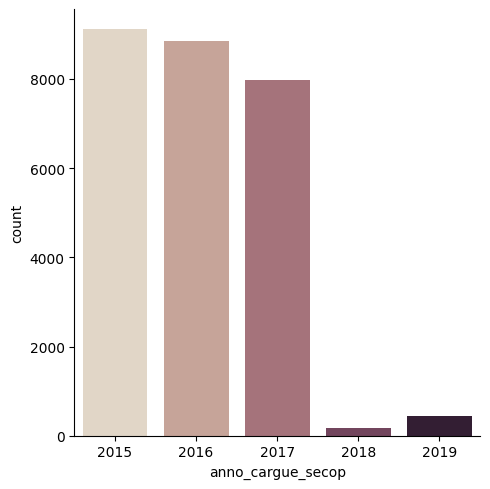

In [303]:
sns.catplot(data=secop_I, x="anno_cargue_secop", kind="count", palette="ch:.25")

El año que contiene mayor número de contratos cargados en la plataforma SECOP I es 2015. La anterior gráfica muestra que para los años del 2015 al 2017, son aquellos años con mayor número de registros. Sin e,abrgo, para los años 2018 al 2019, el número de registros caragdos a la plataforma, disminuye considerablemente.

#### Cuantías de los contratos por años
En principio, resultaría de interés entender como ha sido el comportamiento de las cuantías de los procesos y contratos en función del tiempo.

[Text(0.5, 0, 'Año'), Text(0, 0.5, 'Cuantía por Proceso')]

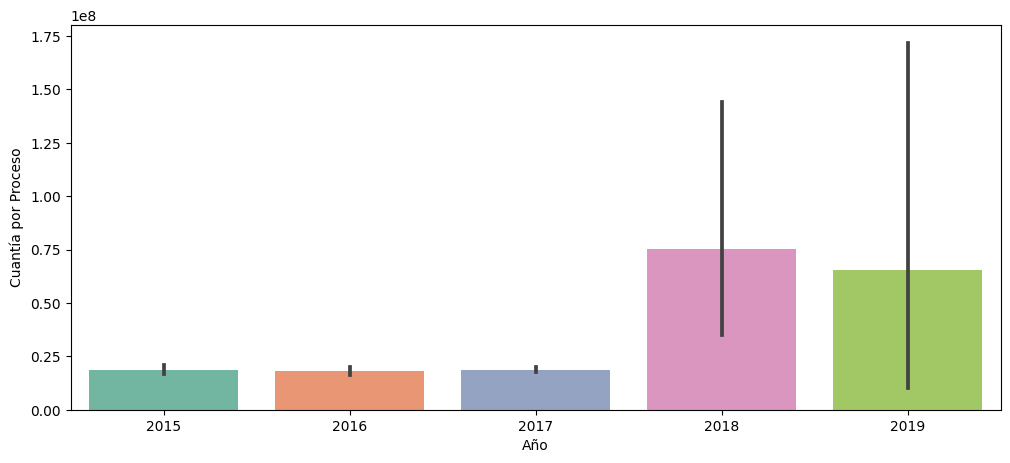

In [304]:
# cuantía media por proceso anual
plt.figure(figsize=(12,5))
sns.set_palette("Set2")
ax = sns.barplot(data=secop_I, x="anno_cargue_secop", y='cuantia_proceso') 
ax.set(xlabel="Año", ylabel="Cuantía por Proceso")

[Text(0.5, 0, 'Año'), Text(0, 0.5, 'Cuantía por Contrato')]

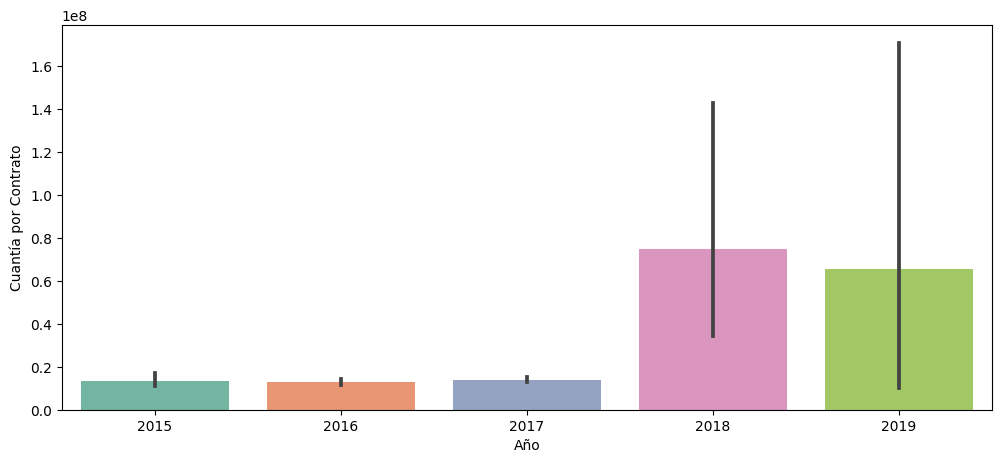

In [305]:
# cuantía media por contrato anual
plt.figure(figsize=(12,5))
sns.set_palette("Set2")
ax = sns.barplot(data=secop_I, x="anno_cargue_secop", y='cuantia_contrato') 
ax.set(xlabel="Año", ylabel="Cuantía por Contrato") 

In [306]:
# cuantía por año
año = secop_I.groupby('anno_cargue_secop')['cuantia_contrato'].sum().sort_values(ascending=False)
año

anno_cargue_secop
2015    123375034557
2016    112353905627
2017    111562477380
2019     28942823318
2018     13558200515
Name: cuantia_contrato, dtype: Int64

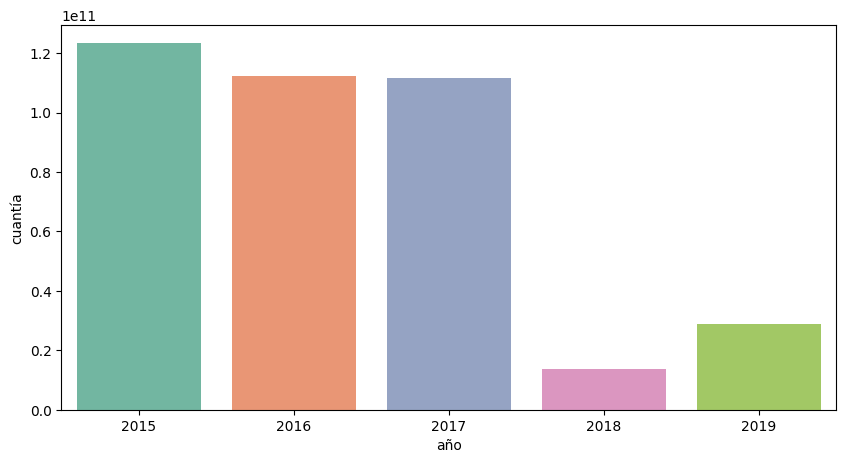

In [307]:
category_anio = año.reset_index()
category_anio.columns = ['año', 'cuantía']
category_anio
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(x='año', y='cuantía', data=category_anio)

De las anteriores gráficas, se puede concluir que los datos se encuentran homogeneos de los años 2015 al 2017. Tanto para el 2018, como para el 2019, los datos muestras datos atípicos (outliers) que podrían generar mayor varaianza en los resultados de los modelos ha implementar. Asimismo, el año que mayor contratación tuvo fue el 2015. Cabe aclarar que los datos por año se encuentran desbalanceados, por lo que para la implementación de futuros modelos se recomienda coger de los años 2015 al 2017.

In [308]:
#sns.catplot(data=secop_I, x="cuantia_contrato", kind="box", palette="ch:.25", hue="anno_cargue_secop")

#### Cuantías por municipio
Es importante enteder como ha sido el gasto de contratación por región. A continuación se presenta, las lineas de codigo para detallar las cuantías por municipio.

In [309]:
# cuantía por municipio
municipio = secop_I.groupby('municipios_ejecucion_')['cuantia_contrato'].sum().sort_values(ascending=False)
municipio

municipios_ejecucion_
bogota       127879232864
bello         14992705995
acacias       14745241821
socorro       13329860625
cali          12855727946
                 ...     
toluviejo               0
san luis                0
cucutilla               0
yacopi                  0
chipaque                0
Name: cuantia_contrato, Length: 228, dtype: Int64

In [310]:
# porcentaje de cuantía por municipio
municipio_per = round(secop_I.groupby('municipios_ejecucion_')['cuantia_contrato'].sum().sort_values(ascending=False) / secop_I['cuantia_contrato'].sum() * 100, 2)
municipio_per

municipios_ejecucion_
bogota       32.81
bello         3.85
acacias       3.78
socorro       3.42
cali           3.3
             ...  
toluviejo      0.0
san luis       0.0
cucutilla      0.0
yacopi         0.0
chipaque       0.0
Name: cuantia_contrato, Length: 228, dtype: Float64

In [333]:
# tabla de frecuencia de municipios
freq_muni = pd.value_counts(secop_I["municipios_ejecucion_"])
print(freq_muni)

# tabla de frecuencia relativa de municipios
freq_rela_muni = 100 * secop_I['municipios_ejecucion_'].value_counts() / len(secop_I['municipios_ejecucion_'])
print(round(freq_rela_muni, 2))

municipios_ejecucion_
bogota           1949
acacias          1831
popayan           715
funza             574
bello             548
                 ... 
san francisco       1
rovira              1
ambalema            1
pailitas            1
baranoa             1
Name: count, Length: 228, dtype: int64
municipios_ejecucion_
bogota           7.34
acacias          6.90
popayan          2.69
funza            2.16
bello            2.06
                 ... 
san francisco    0.00
rovira           0.00
ambalema         0.00
pailitas         0.00
baranoa          0.00
Name: count, Length: 228, dtype: float64


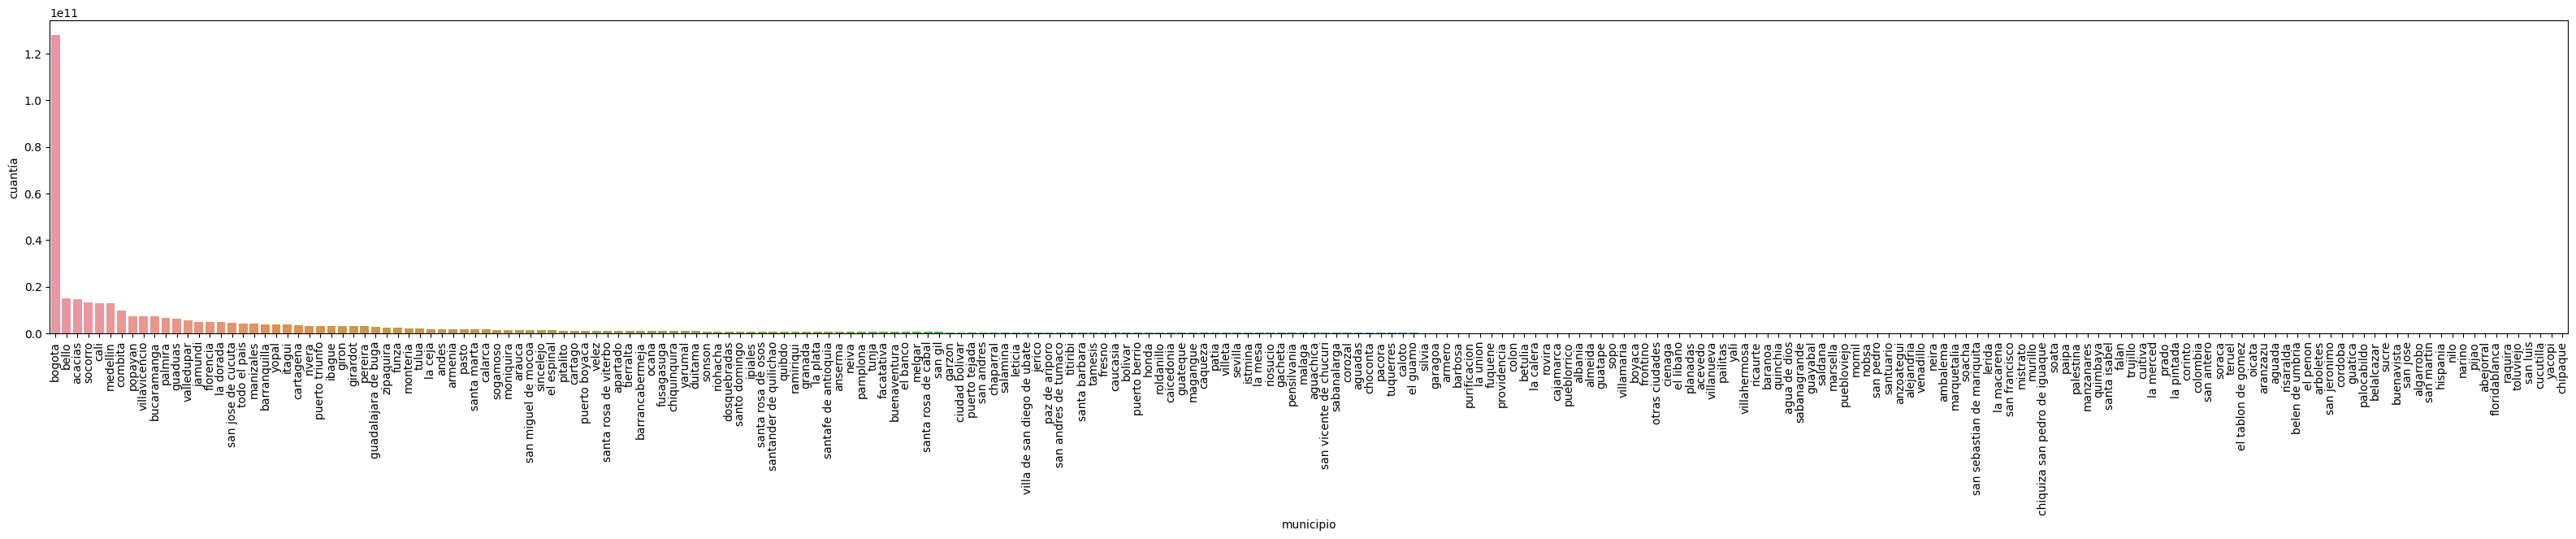

In [312]:
category_muni = municipio.reset_index()
category_muni.columns = ['municipio', 'cuantía']
category_muni
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(40, 5))

ax = sns.barplot(x = 'municipio', y = 'cuantía', data = category_muni)
ax.tick_params(axis='x', rotation=90)

De lo anterior, se puede observar que Bogotá (32.8%), Bello (3.84%) y Acacías (3.78%) son los municipios que en el trancurso de 2015 al 2019 han tenido el amyor gasto en contratación púlica del INPEC. 

#### Cuantías por departamento
A continuación se presenta, las lineas de codigo para detallar las cuantías por departamento.

In [313]:
# cuantía por departamento
departamento = secop_I.groupby('departamento_ejecucion')['cuantia_contrato'].sum().sort_values(ascending=False)
departamento

departamento_ejecucion
bogota                127879232864
antioquia              47544869347
valle del cauca        32394888708
santander              27312997616
meta                   22951622160
boyaca                 19388268834
cundinamarca           18258824154
caldas                 11189997148
cauca                   9953481704
tolima                  7232601470
huila                   6576179615
norte de santander      6476766998
cesar                   6063701165
caqueta                 4777887744
risaralda               4544179971
casanare                4346525787
atlantico               4311906487
colombia                4212440687
bolivar                 3840917799
quindio                 3484888378
narino                  3442488117
cordoba                 3335772103
magdalena               2316752763
sucre                   1702573332
putumayo                1613688819
arauca                  1549075829
choco                   1087106946
la guajira               8756144

In [314]:
# porcentaje de cuantía por departamento
departamento_per = round(secop_I.groupby('departamento_ejecucion')['cuantia_contrato'].sum().sort_values(ascending=False) / secop_I['cuantia_contrato'].sum() * 100, 2)
departamento_per

departamento_ejecucion
bogota                32.81
antioquia              12.2
valle del cauca        8.31
santander              7.01
meta                   5.89
boyaca                 4.97
cundinamarca           4.68
caldas                 2.87
cauca                  2.55
tolima                 1.86
huila                  1.69
norte de santander     1.66
cesar                  1.56
caqueta                1.23
risaralda              1.17
casanare               1.12
atlantico              1.11
colombia               1.08
bolivar                0.99
quindio                0.89
narino                 0.88
cordoba                0.86
magdalena              0.59
sucre                  0.44
putumayo               0.41
arauca                  0.4
choco                  0.28
la guajira             0.22
san andres             0.16
amazonas               0.13
otros paises           0.01
Name: cuantia_contrato, dtype: Float64

In [315]:
# tabla de frecuencia de departamento
freq_depa = pd.value_counts(secop_I["departamento_ejecucion"])
print(freq_depa)

# tabla de frecuencia relativa de departamento
freq_rela_depa = 100 * secop_I['departamento_ejecucion'].value_counts() / len(secop_I['departamento_ejecucion'])
print(round(freq_rela_depa, 2))

departamento_ejecucion
antioquia             3284
meta                  2367
boyaca                2111
valle del cauca       2097
cundinamarca          2091
bogota                1949
santander             1734
caldas                1573
cauca                 1461
tolima                1391
huila                 1024
norte de santander     593
narino                 561
quindio                522
atlantico              512
cesar                  448
risaralda              399
casanare               306
cordoba                273
choco                  268
caqueta                241
magdalena              234
bolivar                216
putumayo               184
sucre                  182
arauca                 165
san andres             145
la guajira             103
amazonas                94
colombia                23
otros paises             2
Name: count, dtype: int64
departamento_ejecucion
antioquia             12.37
meta                   8.91
boyaca                 7.95
valle d

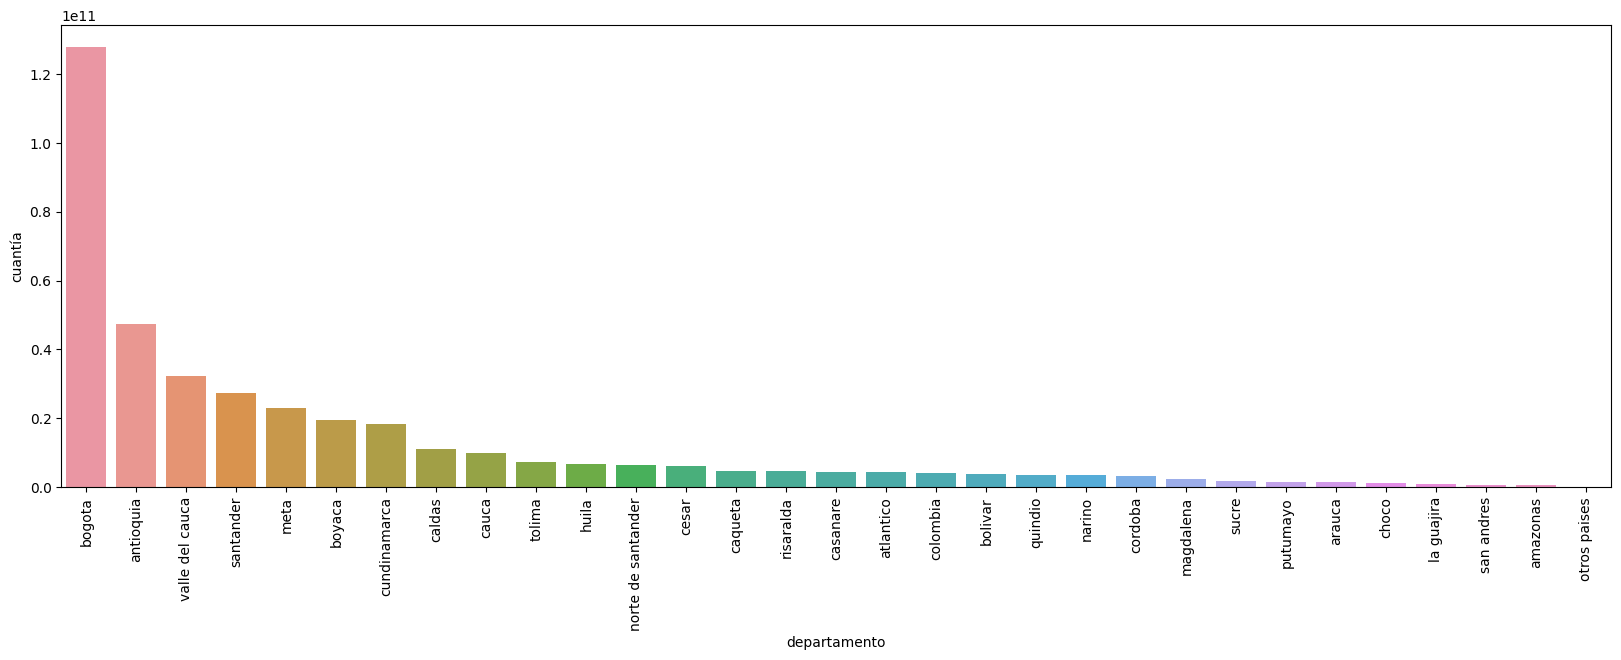

In [316]:
category_depa = departamento.reset_index()
category_depa.columns = ['departamento', 'cuantía']
category_depa
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 6))

ax = sns.barplot(x = 'departamento', y = 'cuantía', data = category_depa)
ax.tick_params(axis='x', rotation=90)

De lo anterior, se puede observar que Bogotá (32.74%), Antioquia (12.1%) y Valle del Cauca (8.29%) son los municipios que en el trancurso de 2015 al 2019 han tenido el amyor gasto en contratación púlica del INPEC. 

#### Cuantías por grupo
A continuación se presenta las lineas de codigo para detallar las cuantías por grupo.

In [317]:
# cuantía por departamento
grupo = secop_I.groupby('nombre_grupo')['cuantia_contrato'].sum().sort_values(ascending=False)
grupo

nombre_grupo
productos de uso final                                 266515062434
servicios                                               76918677436
materias primas                                         22799009203
maquinaria herramientas equipo industrial vehiculos      9364743243
componentes suministros                                  7615371288
material vivo animal vegetal                             5069745893
terrenos edificios estructuras vias                      1509831900
Name: cuantia_contrato, dtype: Int64

In [318]:
# porcentaje de cuantía por departamento
grupo_per = round(secop_I.groupby('nombre_grupo')['cuantia_contrato'].sum().sort_values(ascending=False) / secop_I['cuantia_contrato'].sum() * 100, 2)
grupo_per

nombre_grupo
productos de uso final                                 68.37
servicios                                              19.73
materias primas                                         5.85
maquinaria herramientas equipo industrial vehiculos      2.4
componentes suministros                                 1.95
material vivo animal vegetal                             1.3
terrenos edificios estructuras vias                     0.39
Name: cuantia_contrato, dtype: Float64

In [319]:
# tabla de frecuencia de grupo
freq_grupo = pd.value_counts(secop_I["nombre_grupo"])
print(freq_grupo)

# tabla de frecuencia relativa del grupo
freq_rela_grupo = 100 * secop_I['nombre_grupo'].value_counts() / len(secop_I['departamento_ejecucion'])
print(round(freq_rela_grupo, 2))

nombre_grupo
productos de uso final                                 15875
servicios                                               4729
materias primas                                         2214
material vivo animal vegetal                            1518
componentes suministros                                 1241
maquinaria herramientas equipo industrial vehiculos      943
terrenos edificios estructuras vias                       33
Name: count, dtype: int64
nombre_grupo
productos de uso final                                 59.79
servicios                                              17.81
materias primas                                         8.34
material vivo animal vegetal                            5.72
componentes suministros                                 4.67
maquinaria herramientas equipo industrial vehiculos     3.55
terrenos edificios estructuras vias                     0.12
Name: count, dtype: float64


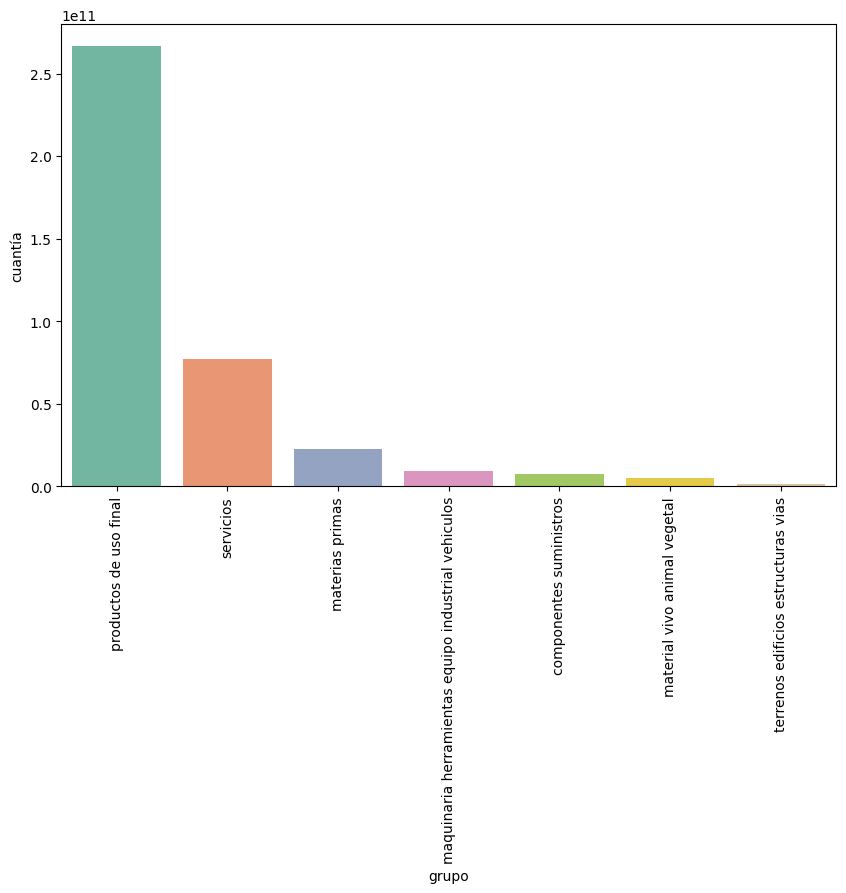

In [320]:
category_grupo = grupo.reset_index()
category_grupo.columns = ['grupo', 'cuantía']
category_grupo
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x='grupo', y='cuantía', data=category_grupo)
ax.tick_params(axis='x', rotation=90)

Para los años comprendidos entre el 2015 al 2019, se puede observar que el INPEC ha destinado su gasto público el productos de uso final (59,79%), segudio por servicios (17,81%) y materias primas (8,34%).

#### Estado del proceso
Asimismo, es de interés revisar cuales son los estados de los contratos. A continuación se presenta las lineas de codigo para revisar el estado de la contratación pública del INPEC de los años del 2015 al 2019.

In [321]:
# número de contratos por estado del proceso
estado = secop_I.groupby(['estado_del_proceso'])['uid'].count().sort_values(ascending=False)
estado

estado_del_proceso
celebrado                 13538
liquidado                 10181
terminado sin liquidar     1428
convocado                  1271
borrador                     68
adjudicado                   47
descartado                   20
Name: uid, dtype: int64

In [322]:
# porcentaje de contratos por estado del proceso
estado_per = round(secop_I.groupby(['estado_del_proceso'])['uid'].count().sort_values(ascending=False) /secop_I['uid'].count() * 100, 2)
estado_per

estado_del_proceso
celebrado                 50.98
liquidado                 38.34
terminado sin liquidar     5.38
convocado                  4.79
borrador                   0.26
adjudicado                 0.18
descartado                 0.08
Name: uid, dtype: float64

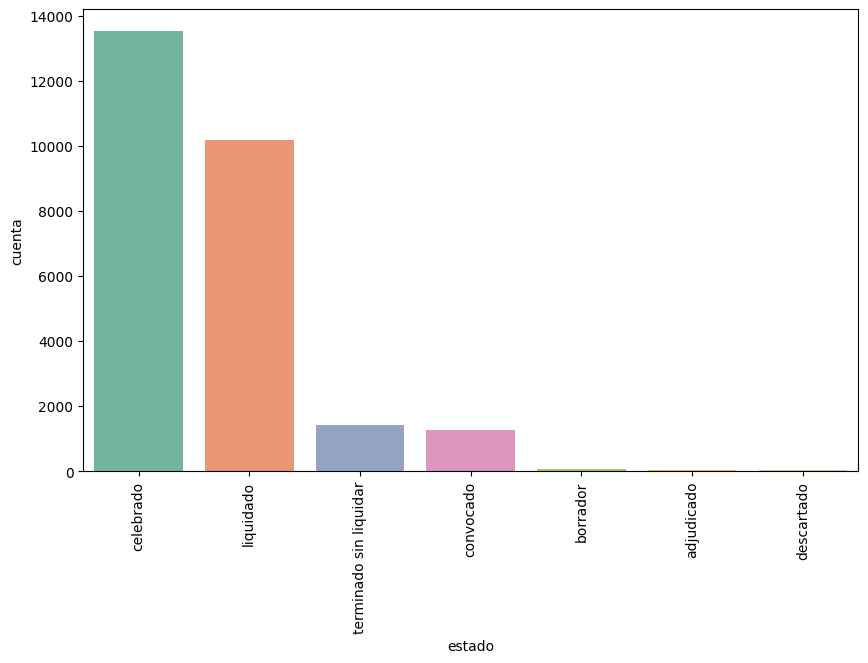

In [323]:
category_estado = estado.reset_index()
category_estado.columns = ['estado', 'cuenta']
category_estado
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x='estado', y='cuenta', data=category_estado)
ax.tick_params(axis='x', rotation=90)

In [324]:
# cuantía por estado
cuantia_por_estado = secop_I.groupby('estado_del_proceso')['cuantia_contrato'].sum().sort_values(ascending=False)
cuantia_por_estado

estado_del_proceso
celebrado                 210685370292
liquidado                 154389870015
terminado sin liquidar     24717201090
adjudicado                           0
borrador                             0
convocado                            0
descartado                           0
Name: cuantia_contrato, dtype: Int64

Las tabalas y gráficas anteriores, muestran que el 94.7% de los datos (celebrado --> 50.98%, liquidado --> 38.34%, terminado sin liquidar --> 5.38%) para el estado del proceso su valor es mayor a cero. Para los otros estados (adjudicado, borrado, convocado y descartado) se puede observar que la cuantía del proceso es igual a cero, infiriendo que para contratos que se encuentran en este estado estos nunca fueron finalizados, su proceso continua a la fecha o hace falta algún tipo de actualización en la plataforma SECOP I. Dichos registros representan el 5,3% del dataset.

#### Contratos prorrogados
A continuación se presenta las lineas de codigo para detallar el número de contratos prorrogados.

In [325]:
# número de contratos prorrogados
prorrogados = secop_I['prorrogado'].sum()
print("El número de contratos prorrogados fue de: ", prorrogados)

El número de contratos prorrogados fue de:  730


In [326]:
# porcentaje de contratos prorrogados
prorrogados_per = round(secop_I['prorrogado'].sum() / len(secop_I) * 100, 2)
print("El porcentaje de contratos prorrogados fue de: ", prorrogados_per)

El porcentaje de contratos prorrogados fue de:  2.75


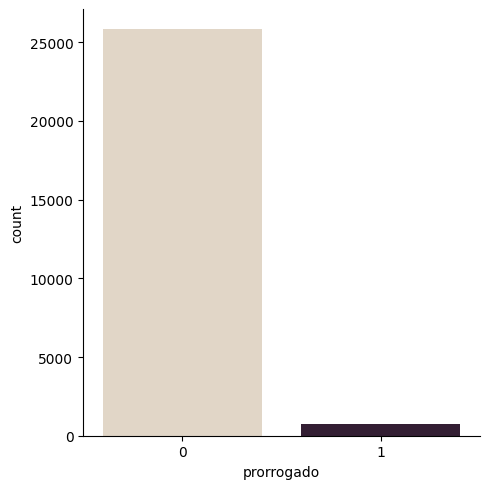

In [327]:
sns.catplot(data=secop_I, x="prorrogado", kind="count", palette="ch:.25")

El número de contratos prorrogados fue de 730 contratos, los cuales representan el 2.75% del total de registros.

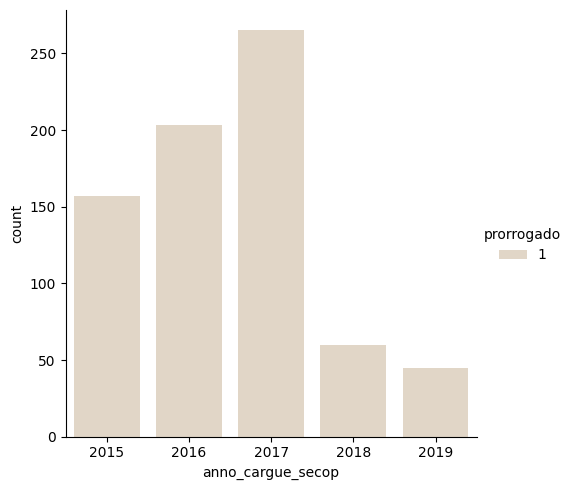

In [328]:
# número de contratos prorrogados por año
prorrogados_filter = secop_I[(secop_I.prorrogado == 1)]
sns.catplot(data=prorrogados_filter, x="anno_cargue_secop", kind="count", palette="ch:.25", hue="prorrogado")

El año 2017, es el periodo en el cual se presenta un mayor número de contratos prorrogados. Ahora bien, es de importancia entender el número de días por el cual fue prorrogado el contrato.

#### Contratos con adición presupuestal
A continuación se presenta las lineas de codigo para detallar el número de contratos con adición presupuestal.

In [329]:
# número de contratos con adición presupuestal
adicion = secop_I['con_adicion_pptal'].sum()
print("El número de contratos con adición presupuestal fue de: ", adicion)

El número de contratos con adición presupuestal fue de:  2797


In [330]:
# porcentaje de contratos con adición presupuestal
adicion_per = round(secop_I['con_adicion_pptal'].sum() / len(secop_I) * 100, 2)
print("El porcentaje de contratos prorrogados fue de: ", adicion_per)

El porcentaje de contratos prorrogados fue de:  10.53


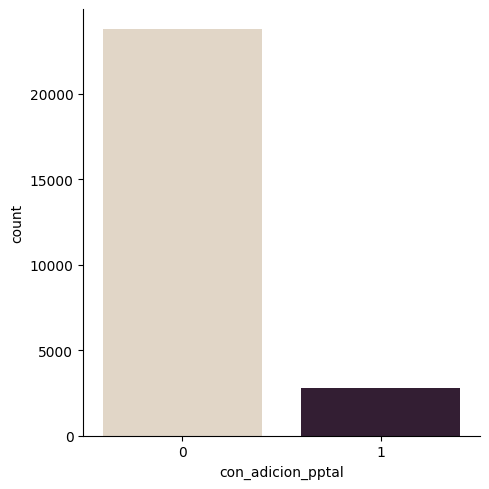

In [331]:
sns.catplot(data=secop_I, x="con_adicion_pptal", kind="count", palette="ch:.25")

El número de contratos con adición presupuestal fue de 2.797 contratos, los cuales representan el 10.53% del total de registros.

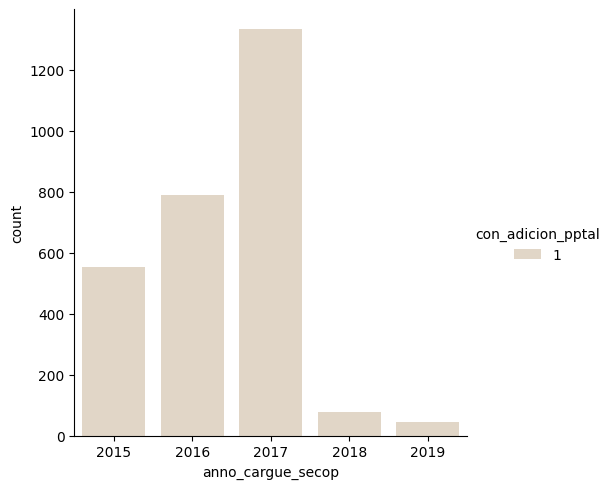

In [332]:
# número de contratos con adición presupuestal por año
adicion_filter = secop_I[(secop_I.con_adicion_pptal == 1)]
sns.catplot(data=adicion_filter, x="anno_cargue_secop", kind="count", palette="ch:.25", hue="con_adicion_pptal")

El año 2017, es el periodo en el cual se presenta un mayor número de contratos con adición presupuestal.